In [13]:
from gan import gan
import matplotlib.pyplot as plt
import numpy as np

In [3]:
starwars = gan(ndays=8)
starwars.make_generator()
starwars.make_discriminator()
starwars.model()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               98560     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dens

In [4]:
import pandas as pd
dfile = '../notebooks/subsampled_8d.csv'
df = pd.read_csv(dfile, sep='\s+', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,-1.000000,-0.506632,0.066652,0.133698,0.349325,-0.877512,-0.676846,-0.379420,0.248126,0.497417,...,0.166143,0.117270,-0.215240,0.286650,-0.248252,0.286321,-0.112260,0.542157,0.778996,-0.018824
1,-0.876683,-0.716852,0.002102,0.065405,0.532775,-0.533315,-0.600222,-0.228225,-0.036970,0.597960,...,-0.010402,0.159072,-0.417181,0.503167,-0.363808,0.283099,-0.009477,0.664791,0.758236,-0.222910
2,-0.751021,-0.626735,0.007324,-0.061483,0.599464,-0.387442,-0.218987,0.047891,-0.146336,0.736461,...,-0.180973,0.034944,-0.577927,0.611356,-0.616627,0.286423,-0.106165,0.723547,0.661819,-0.730207
3,-0.262025,-0.677789,-0.127201,-0.209722,0.595691,-0.731157,0.076928,0.205408,-0.346460,0.744457,...,-0.253881,0.050318,-0.530749,0.482994,-0.513768,0.222507,-0.159136,0.733139,0.605737,-0.554197
4,0.021603,-0.488541,-0.197182,-0.433672,0.410943,-0.819399,0.059303,0.175557,-0.518720,0.755556,...,-0.372847,0.083688,-0.410897,0.433182,-0.194622,0.325576,-0.213290,0.711294,0.463901,-0.232628


In [5]:
print(df.values.T.shape)

(16384, 384)


In [6]:
starwars.X_train = df.values.T

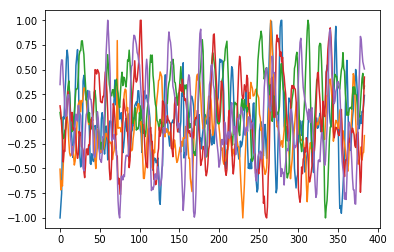

In [7]:
starwars.plot_some_data(nd=5)

In [8]:
%%time 
starwars.train(epochs=200)

Instructions for updating:
Use tf.cast instead.
Epoch: 0 D loss: 0.7031380534172058 G loss: 0.5301012992858887
Epoch: 10 D loss: 0.4891163110733032 G loss: 1.2647632360458374
Epoch: 20 D loss: 0.7187627553939819 G loss: 0.568035364151001
Epoch: 30 D loss: 0.7112559676170349 G loss: 0.6541323661804199
Epoch: 40 D loss: 0.694989800453186 G loss: 0.6780489087104797
Epoch: 50 D loss: 0.7031513452529907 G loss: 0.6841253042221069
Epoch: 60 D loss: 0.7023956775665283 G loss: 0.6910138130187988
Epoch: 70 D loss: 0.6992813348770142 G loss: 0.6852416396141052
Epoch: 80 D loss: 0.6967061758041382 G loss: 0.7070143222808838
Epoch: 90 D loss: 0.6969795227050781 G loss: 0.6938118934631348
Epoch: 100 D loss: 0.69675213098526 G loss: 0.6994438767433167
Epoch: 110 D loss: 0.693393886089325 G loss: 0.6987220644950867
Epoch: 120 D loss: 0.6913853287696838 G loss: 0.7020140886306763
Epoch: 130 D loss: 0.6887674331665039 G loss: 0.7097761631011963
Epoch: 140 D loss: 0.6994909048080444 G loss: 0.7001149654

Fake images shape : (1, 384)


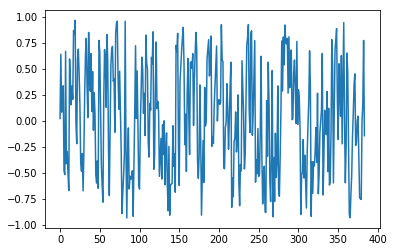

In [9]:
starwars.make_img()
plt.show()

Fake images shape : (5, 384)


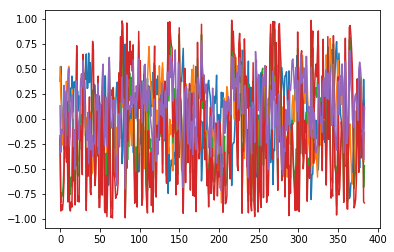

In [10]:
nd = 5
noise = starwars.noise(nd)
fake_images = starwars.gen_model.predict(noise)
print(f'Fake images shape : {fake_images.shape}')
fig, ax = plt.subplots()
ax.plot(fake_images.T)

In [22]:
from numpy.fft import rfft, fftshift

In [38]:
pspecs = (rfft(fake_images**2.,axis=0))

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


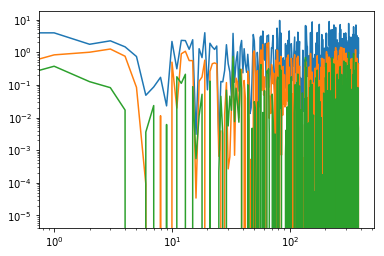

In [39]:
plt.plot(pspecs.T**2.)
plt.xscale('log')
plt.yscale('log')

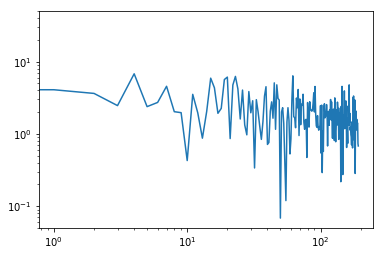

In [43]:
plt.plot(np.abs(rfft(fake_images[0,:]**2)))
plt.xscale('log')
plt.yscale('log')